# Similarities

Similarities between topics. This is a very simple approach to determine if two topics are similar. It is based on **entire** training data set, using 98 assignments.

The similarity is calculated using the cosine similarity between the vectors of the two topics. The vectors are calculated using the average of the vectors of each document in the topic.

The similarity is calculated using the spaCy model `es_core_news_lg` (Spanish, multitask CNN trained on OntoNotes. Assigns context-specific token vectors, POS tags, dependency parse and named entities).

Calculation can take **UP TO 3 hours**, depending on your hardware. The result is a heatmap of the average similarity between topics.

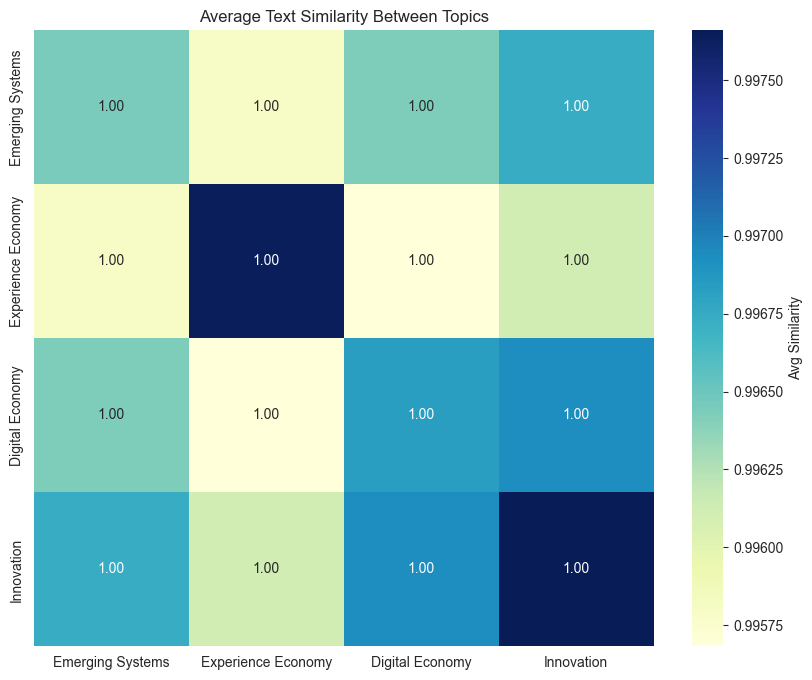

In [5]:


import pandas as pd
import seaborn as sns
import spacy
from matplotlib import pyplot as plt

from heimdallr.dependencies import NLP_SPANISH

nlp = spacy.load(NLP_SPANISH)

df = pd.read_csv("F:\\dev\\heimdallr\\db\\training.csv")


def calculate_cosine_similarity(text1, text2):
    doc1 = nlp(text1)
    doc2 = nlp(text2)
    return doc1.similarity(doc2)


def calculate_avg_similarity(df, topic1, topic2):
    topic_df1 = df[df['topic'] == topic1]
    topic_df2 = df[df['topic'] == topic2]
    total_similarity = 0
    total_pairs = 0

    for _, row1 in topic_df1.iterrows():
        for _, row2 in topic_df2.iterrows():
            total_similarity += calculate_cosine_similarity(' '.join(row1['content']), ' '.join(row2['content']))
            total_pairs += 1

    if total_pairs > 0:
        avg_similarity = total_similarity / total_pairs
        return avg_similarity
    else:
        return 0


# Create a matrix of average similarities
topics = df['topic'].unique()
similarity_matrix = [[calculate_avg_similarity(df, topic1, topic2) for topic2 in topics] for topic1 in topics]

# Create a DataFrame from the similarity matrix
similarity_df = pd.DataFrame(similarity_matrix, index=topics, columns=topics)



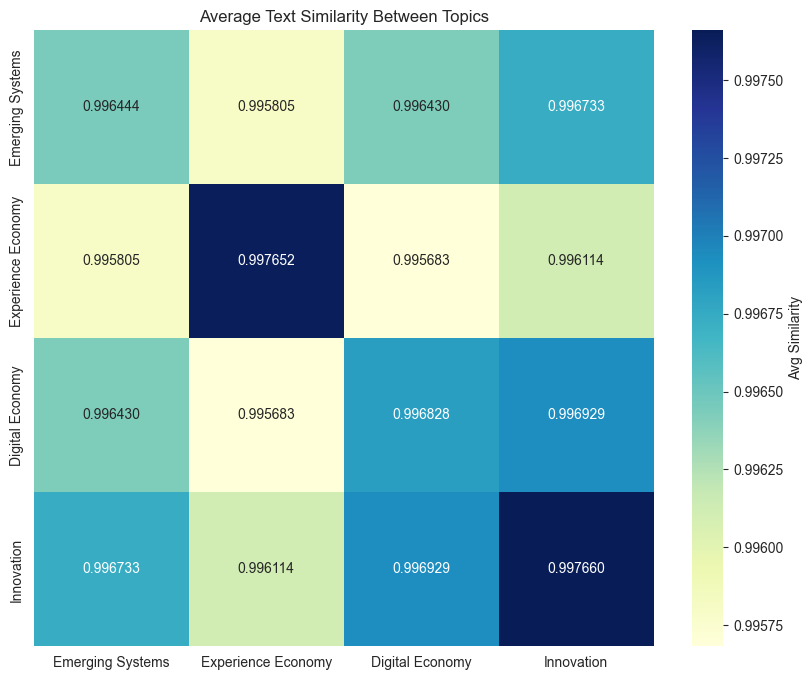

In [6]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_df, annot=True, cmap="YlGnBu", fmt=".6f", cbar_kws={'label': 'Avg Similarity'})
plt.title("Average Text Similarity Between Topics")
plt.show()

In [10]:
similarity_df

,Emerging Systems,Experience Economy,Digital Economy,Innovation
Emerging Systems,0.996444,0.995805,0.996430,0.996733
Experience Economy,0.995805,0.997652,0.995683,0.996114
Digital Economy,0.996430,0.995683,0.996828,0.996929
Innovation,0.996733,0.996114,0.996929,0.997660


In [23]:
# Assuming similarity_df is your similarity matrix

# Collect similarity scores for pairs within the same topic
same_topic_scores = [0.996444, 0.997652, 0.996828, 0.997660]

# Collect similarity scores for pairs from different topics
diff_topic_scores = [0.995805,
                     0.996430,
                     0.996733,

                     0.995805,
                     0.995683,
                     0.996114,

                     0.996430,
                     0.995683,
                     0.996929,

                     0.996733,
                     0.996114,
                     0.996929,
                     ]

# Calculate the probability
threshold = 0.996

# Check for empty lists to avoid division by zero
prob_same_topic = sum(score >= threshold for score in same_topic_scores) / len(same_topic_scores) if len(
    same_topic_scores) > 0 else 0
prob_diff_topic = sum(score >= threshold for score in diff_topic_scores) / len(diff_topic_scores) if len(
    diff_topic_scores) > 0 else 0

print(f"Probability of same topic: {prob_same_topic:.2%}")
print(f"Probability of different topics: {prob_diff_topic:.2%}")

Probability of same topic: 100.00%
Probability of different topics: 66.67%
